## Final Project Submission

Please fill out:
* Student name: Andre Layton
* Student pace: Part-time Flex Cohort
* Scheduled project review date/time: September 11th, 2023 at 1pm
* Instructor name: Morgan Jones
* Blog post URL: 


## Overview
Keller Williams Realty has acquired some new property that they are looking to put on the market and sell within the 1-2 years. Houses in their inventory (?) are allotted more time before reselling, but this is their first property in the Pacific Northwest, and would like to use this project to expand their business into that region. This project aims to give Keller Williams an idea on what specific renovations they need to focus on in order to drive the sales price higher and by how much.

## Business Problem
If you are struggling to define a stakeholder, we recommend you complete a project for a real estate agency that helps homeowners buy and/or sell homes. A business problem you could focus on for this stakeholder is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

-**Keller Williams Realty**
Founded in Austin, Texas, in 1983 by Gary Keller and Joe Williams, Keller Williams Realty has grown to be an international real estate brokerage with a focus on technology, similar to many other major brokerages thriving today.

In November, Keller Williams Realty reported agents had closed $381.4 billion in deals in the first three-quarters of 2022. In the same report, the company noted it has more than 177,000 agents in the U.S. and Canada, with another 17,000 in other countries.

With that number of agents, it shouldn’t be a surprise that people in the U.S. should be able to find a Keller Williams agent just about anywhere.

-What renovations will increase the estimated value (price) of the homes?

-By how much?

## Data Understanding
....

In [ ]:
# Your code here - remember to use markdown cells for comments as wseell!

In [140]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import math
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# %load column_names.md
# Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

The `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). In some cases due to missing or incorrectly-entered data from the King County Assessor, this API returned locations outside of King County, WA. If you plan to use the `address`, `lat`, or `long` fields in your modeling, consider identifying outliers prior to including the values in your model.


In [142]:
housing_data = pd.read_csv('kc_house_data.csv')
housing_df2 = housing_data.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'address', 'lat', 'long'], 
                               axis=1)
housing_df2.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built
0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7 Average,Gas,PUBLIC,0,40,1969
1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,7 Average,Oil,PUBLIC,0,240,1950
2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,0,0,1956
3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,Average,9 Better,Gas,PUBLIC,200,270,2010
4,8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,Average,7 Average,Electricity,PUBLIC,550,30,2012
5,2807100156,625000.0,2,1.0,1190,5688,1.0,NO,NO,YES,Average,7 Average,Electricity,PUBLIC,300,0,1948
6,5122400111,1317227.0,3,3.0,2080,27574,1.0,NO,NO,NO,Good,9 Better,Oil,PRIVATE,0,150,1951
7,7137850210,820000.0,3,2.5,2214,3506,2.0,NO,NO,NO,Average,8 Good,Gas,PUBLIC,440,206,2019
8,2944500680,780000.0,4,2.5,2340,8125,2.0,NO,NO,NO,Average,8 Good,Gas,PUBLIC,440,70,1989
9,2619950340,975000.0,4,2.5,2980,5859,2.0,NO,NO,NO,Average,8 Good,Gas,PUBLIC,540,170,2011


....Begin talking about previewing information in this dataset...

In [143]:
housing_df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,330.211142,217.412038,1975.163953
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,285.770536,245.302792,32.067362
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,40.000000,1953.000000
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,400.000000,150.000000,1977.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,510.000000,320.000000,2003.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,3580.000000,4370.000000,2022.000000


In [144]:
housing_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30155 non-null  int64  
 1   price         30155 non-null  float64
 2   bedrooms      30155 non-null  int64  
 3   bathrooms     30155 non-null  float64
 4   sqft_living   30155 non-null  int64  
 5   sqft_lot      30155 non-null  int64  
 6   floors        30155 non-null  float64
 7   waterfront    30155 non-null  object 
 8   greenbelt     30155 non-null  object 
 9   nuisance      30155 non-null  object 
 10  condition     30155 non-null  object 
 11  grade         30155 non-null  object 
 12  heat_source   30123 non-null  object 
 13  sewer_system  30141 non-null  object 
 14  sqft_garage   30155 non-null  int64  
 15  sqft_patio    30155 non-null  int64  
 16  yr_built      30155 non-null  int64  
dtypes: float64(3), int64(7), object(7)
memory usage: 3.9+ MB


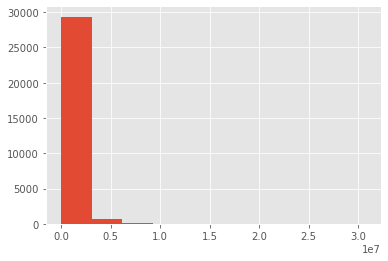

In [145]:
housing_df2['price'].hist();

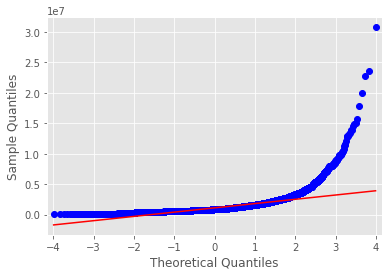

In [146]:
sm.qqplot(housing_df2['price'], line='r');

...plots above show that price data is not normally distributed.. 
shows more right skewness.. decide what to do (i.e drop outliers)

In [147]:
# Create function to find outliers using IQR
def find_outliers(df):
    q1 = df.quantile(.25)
    q3 = df.quantile(.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5*IQR)) | (df > (q3 + 1.5*IQR)))]
    return outliers

outliers_list = find_outliers(housing_df2['price'])
outliers_list

27       4500000.0
36       2450000.0
43       3850000.0
84       2500000.0
118      3000000.0
           ...    
30100    2588000.0
30106    2875000.0
30126    3754500.0
30130    2435000.0
30140    2650000.0
Name: price, Length: 1994, dtype: float64

In [148]:
Q1 = housing_df2['price'].quantile(.25)
Q3 = housing_df2['price'].quantile(.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Creates arrays of Boolean values that identify outliers
upper_array = np.where(housing_df2['price'] > upper)[0]
lower_array = np.where(housing_df2['price'] < lower)[0]
 
# Removing the outliers
housing_df2.drop(index=upper_array, inplace=True)
housing_df2.drop(index=lower_array, inplace=True)

housing_df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
count,2.816100e+04,2.816100e+04,28161.000000,28161.000000,28161.000000,2.816100e+04,28161.000000,28161.000000,28161.000000,28161.000000
mean,4.572098e+09,9.415585e+05,3.358084,2.247505,1987.851142,1.561351e+04,1.523739,314.413302,202.336245,1974.448422
std,2.881335e+09,4.348862e+05,0.954562,0.797944,799.542258,5.399179e+04,0.567227,272.278543,226.883908,31.907246
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000
25%,2.125049e+09,6.300000e+05,3.000000,2.000000,1390.000000,4.731000e+03,1.000000,0.000000,40.000000,1953.000000
50%,3.881900e+09,8.299500e+05,3.000000,2.500000,1860.000000,7.320000e+03,1.500000,380.000000,140.000000,1977.000000
75%,7.300401e+09,1.199000e+06,4.000000,2.500000,2460.000000,1.013700e+04,2.000000,500.000000,300.000000,2002.000000
max,9.904000e+09,2.276500e+06,11.000000,7.500000,8020.000000,3.067495e+06,4.000000,3580.000000,4370.000000,2022.000000


In [149]:
housing_df2['heat_source'].value_counts()

Gas                  18893
Electricity           6260
Oil                   2822
Gas/Solar               76
Electricity/Solar       57
Other                   18
Oil/Solar                4
Name: heat_source, dtype: int64

## Data Preparation

In [150]:
# Begin filtering data
housing_df3 = housing_df2[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'heat_source',
                          'sqft_garage', 'sqft_patio']]

# Filter dataset to houses with certain heating sources (e.g., the top three)
top3_hs = ['Gas', 'Electricity', 'Oil']
housing_df3 = housing_df3[housing_df3['heat_source'].isin(top3_hs)]
housing_df3.tail(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,heat_source,sqft_garage,sqft_patio
30145,2423089047,705000.0,3,2.5,2260,50965,2.0,Electricity,480,200
30146,3915500105,380000.0,3,1.0,860,7805,1.0,Gas,0,0
30147,2865600230,665000.0,3,2.5,2100,7210,2.0,Gas,440,40
30148,6142050730,1325000.0,5,3.5,3100,6428,2.0,Gas,710,110
30149,9376300851,719000.0,3,2.5,1270,1141,2.0,Gas,200,60
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,Oil,0,210
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,Gas,0,520
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,Gas,240,110
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,Gas,480,100
30154,9557800100,500000.0,3,1.5,1200,11058,1.0,Oil,420,0


In [151]:
# Dummying the 'heat_source' column
housing_df4 = pd.get_dummies(housing_df3, prefix=['Heat Source'], prefix_sep=': ', columns = ['heat_source'])

# Rename features
housing_df4.rename(columns= {'id':'House ID Number', 'price':'Sales Price', 'bedrooms':'No. of Bedrooms', 
                             'bathrooms':'No. of Bathrooms', 'sqft_living':'Sq. Ft. (Living Room)', 'sqft_lot':'Sq. Ft. (Lot)',
                             'floors':'No. of Floors', 'sqft_garage':'Sq. Ft. (Garage)', 'sqft_patio':'Sq. Ft. (Patio)'}, 
                   inplace=True)

# Reorder columns & set new index
floors_col = housing_df4.pop('No. of Floors')
housing_df4.insert(4, floors_col.name, floors_col)
housing_df4.set_index('House ID Number').head()

,Sales Price,No. of Bedrooms,No. of Bathrooms,No. of Floors,Sq. Ft. (Living Room),Sq. Ft. (Lot),Sq. Ft. (Garage),Sq. Ft. (Patio),Heat Source: Electricity,Heat Source: Gas,Heat Source: Oil
House ID Number,,,,,,,,,,,
7399300360,675000.0,4,1.0,1.0,1180,7140,0,40,0,1,0
8910500230,920000.0,5,2.5,1.0,2770,6703,0,240,0,0,1
1180000275,311000.0,6,2.0,1.0,2880,6156,0,0,0,1,0
1604601802,775000.0,3,3.0,2.0,2160,1400,200,270,0,1,0
8562780790,592500.0,2,2.0,2.0,1120,758,550,30,1,0,0


In [152]:
housing_df4.corr()

,House ID Number,Sales Price,No. of Bedrooms,No. of Bathrooms,No. of Floors,Sq. Ft. (Living Room),Sq. Ft. (Lot),Sq. Ft. (Garage),Sq. Ft. (Patio),Heat Source: Electricity,Heat Source: Gas,Heat Source: Oil
House ID Number,1.000000,0.001814,0.003434,0.008790,0.042603,-0.002425,-0.120422,0.005129,-0.035008,-0.063644,0.071086,-0.022448
Sales Price,0.001814,1.000000,0.315638,0.432814,0.197222,0.564030,0.077719,0.238273,0.245476,-0.154912,0.183332,-0.070663
No. of Bedrooms,0.003434,0.315638,1.000000,0.557323,0.117191,0.645409,0.002803,0.295881,0.137686,-0.187112,0.218732,-0.081142
No. of Bathrooms,0.008790,0.432814,0.557323,1.000000,0.397364,0.721982,0.024248,0.422299,0.264242,-0.113026,0.267212,-0.259042
No. of Floors,0.042603,0.197222,0.117191,0.397364,1.000000,0.286241,-0.042310,0.111338,0.111554,0.032334,0.111435,-0.218002
Sq. Ft. (Living Room),-0.002425,0.564030,0.645409,0.721982,0.286241,1.000000,0.117642,0.481417,0.331139,-0.214017,0.276598,-0.133878
Sq. Ft. (Lot),-0.120422,0.077719,0.002803,0.024248,-0.042310,0.117642,1.000000,0.081111,0.160782,0.075292,-0.078875,0.018440
Sq. Ft. (Garage),0.005129,0.238273,0.295881,0.422299,0.111338,0.481417,0.081111,1.000000,0.172700,-0.196962,0.300939,-0.195324
Sq. Ft. (Patio),-0.035008,0.245476,0.137686,0.264242,0.111554,0.331139,0.160782,0.172700,1.000000,0.053209,0.012450,-0.092992
Heat Source: Electricity,-0.063644,-0.154912,-0.187112,-0.113026,0.032334,-0.214017,0.075292,-0.196962,0.053209,1.000000,-0.774403,-0.179842


...Make decisions on what two features to focus on renovating (maybe 3)...

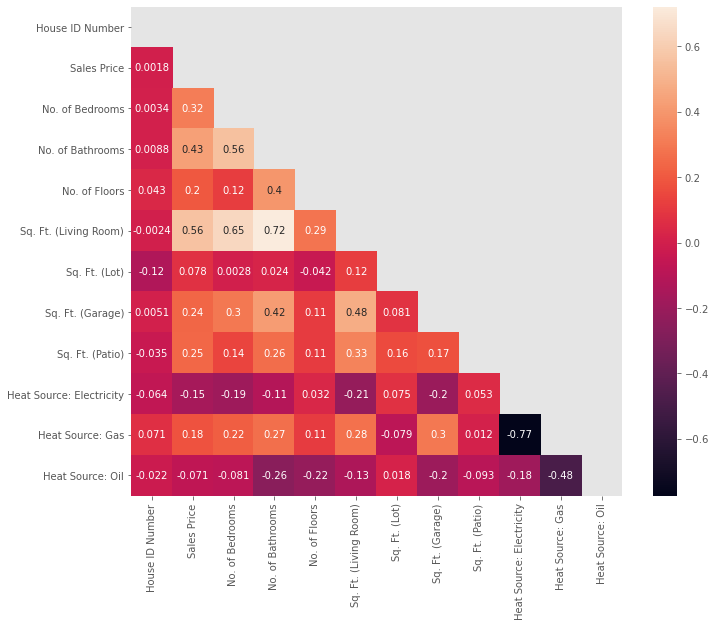

In [153]:
fig, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(housing_df4.corr(), dtype=bool))
sns.heatmap(housing_df4.corr(), mask=mask, annot=True);

...talk about heatmap...

...find which variables violate the multicollinearity principle..

In [154]:
data_copy = housing_df4.copy()
data_copy = data_copy.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_copy['Predictor pairs'] = list(zip(data_copy['level_0'], data_copy['level_1']))
data_copy.set_index(['Predictor pairs'], inplace = True)
data_copy.drop(columns=['level_0', 'level_1'], inplace=True)
data_copy.rename(columns={0:'Correlation (r)'}, inplace=True)
data_copy.drop_duplicates(inplace=True)

In [155]:
data_copy.head(20)

,Correlation (r)
Predictor pairs,
"(House ID Number, House ID Number)",1.000000
"(Heat Source: Gas, Heat Source: Electricity)",0.774403
"(Sq. Ft. (Living Room), No. of Bathrooms)",0.721982
"(Sq. Ft. (Living Room), No. of Bedrooms)",0.645409
"(Sales Price, Sq. Ft. (Living Room))",0.564030
"(No. of Bedrooms, No. of Bathrooms)",0.557323
"(Heat Source: Gas, Heat Source: Oil)",0.483107
"(Sq. Ft. (Garage), Sq. Ft. (Living Room))",0.481417
"(No. of Bathrooms, Sales Price)",0.432814


...talk about the correlations here (i.e., remove certain predictors from the running, use sales price as a baseline model, etc)...

... plot sq. ft. living room w/ price.. USE FORMATTER FROM PROJECT 1!!

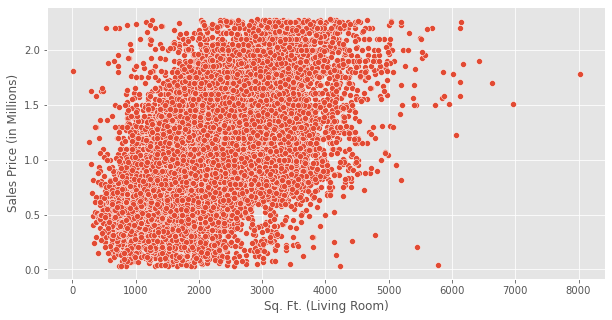

In [101]:
fig, ax = plt.subplots(figsize=(10, 5))

# Y-axis formatter - Customizing the Y-axis scale
def million_formatter(x, pos):
    return str(round(x / 1e6, 1))

ax.yaxis.set_major_formatter(million_formatter)
ax.set_yticks(range(0, 3000000, 500000))

sns.scatterplot(data = housing_df4, x='Sq. Ft. (Living Room)', y='Sales Price')
ax.set_xlabel("Sq. Ft. (Living Room)")
ax.set_ylabel("Sales Price (in Millions)");

## Data Modeling
...start modeling data!!

In [59]:
df4_copy = housing_df4.copy()
X = df4_copy[['Sq. Ft. (Living Room)']]
y = df4_copy['Sales Price']

baseline_model = sm.OLS(y, sm.add_constant(X)).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sales Price   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                 1.305e+04
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:11:57   Log-Likelihood:            -3.9747e+05
No. Observations:               27975   AIC:                         7.950e+05
Df Residuals:                   27973   BIC:                         7.950e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.316e+05   5750.530     57.660      0.000     3.2e+05    3.43e+05
Sq. Ft. (Living Room)   306.6441      2.684    114.241      0.000     301.383     311.905
==============================================================================
Omnibus:                     1491.764   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1891.903
Skew:                           0.533   Prob(JB):                         0.00
Kurtosis:                       3.697   Cond. No.                     5.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
baseline_model.pvalues

const                    0.0
Sq. Ft. (Living Room)    0.0
dtype: float64

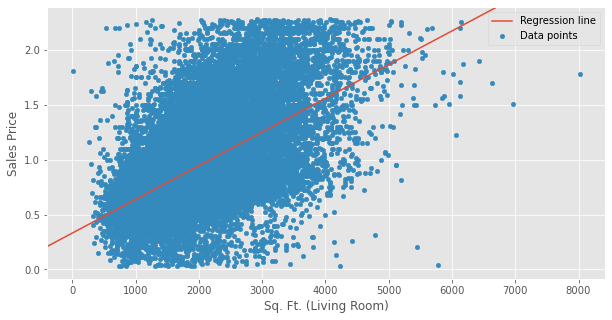

In [86]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.yaxis.set_major_formatter(million_formatter)
df4_copy.plot.scatter(x="Sq. Ft. (Living Room)", y="Sales Price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_model, label="Regression line", ax=ax)
ax.legend();

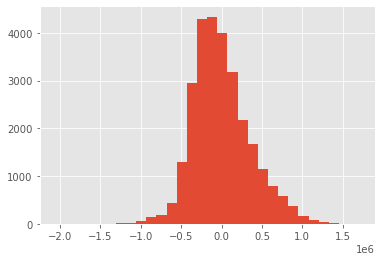

In [62]:
lr = LinearRegression().fit(X, y)
df4_copy['Calculated'] = lr.predict(X)
df4_copy['Residuals'] = y - df4_copy['Calculated']
fig, ax = plt.subplots()
ax.hist(df4_copy['Residuals'], bins=30);

...talk about regression model & residual model's normality...


...now to explore the heat sources..

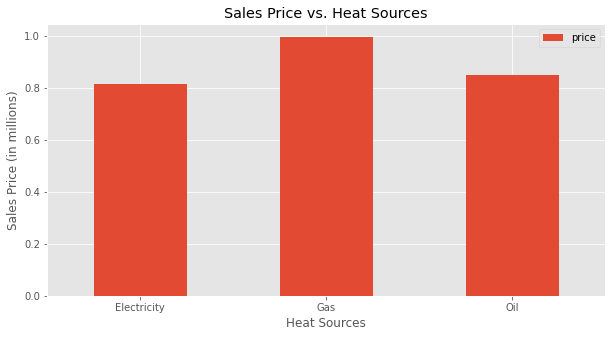

In [114]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.ticklabel_format(style='plain', axis='both')
ax.yaxis.set_major_formatter(million_formatter)
housing_df3.groupby('heat_source').mean().plot.bar(y="price", ax=ax).set(
    ylabel = "Sales Price (in millions)", xlabel="Heat Sources", title="Sales Price vs. Heat Sources")
ax.tick_params(axis='x', labelrotation=0);

In [161]:
X_heating = df4_copy[['Heat Source: Electricity', 'Heat Source: Gas', 'Heat Source: Oil']]
heating_model = sm.OLS(y, sm.add_constant(X_heating))
heating_results = heating_model.fit()

heating_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sales Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     327.8
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          3.19e-209
Time:                        04:19:03   Log-Likelihood:            -4.0235e+05
No. Observations:               27975   AIC:                         8.047e+05
Df Residuals:                   27971   BIC:                         8.047e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.135e+16   2.42e+16      1.295      0.195   -1.61e+16    7.88e+16
Heat Source: Electricity -3.135e+16   2.42e+16     -1.295      0.195   -7.88e+16    1.61e+16
Heat Source: Gas         -3.135e+16   2.42e+16     -1.295      0.195   -7.88e+16    1.61e+16
Heat Source: Oil         -3.135e+16   2.42e+16     -1.295      0.195   -7.88e+16    1.61e+16
==============================================================================
Omnibus:                     2666.150   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3488.553
Skew:                           0.851   Prob(JB):                         0.00
Kurtosis:                       3.311   Cond. No.                     2.37e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.76e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [158]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)

df5_copy = housing_df4.drop('Sales Price', axis=1)
select.fit(X = df5_copy, y=y)
select.support_

array([False,  True,  True, False, False, False, False, False,  True,
       False, False])

In [164]:
X_heating_elec = df4_copy[['Heat Source: Electricity']]
elec_model = sm.OLS(y, sm.add_constant(X_heating_elec))
elec_results = elec_model.fit()

elec_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sales Price   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     687.8
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          8.75e-150
Time:                        04:28:30   Log-Likelihood:            -4.0249e+05
No. Observations:               27975   AIC:                         8.050e+05
Df Residuals:                   27973   BIC:                         8.050e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     9.773e+05   2909.438    335.912      0.000    9.72e+05    9.83e+05
Heat Source: Electricity -1.613e+05   6150.451    -26.226      0.000   -1.73e+05   -1.49e+05
==============================================================================
Omnibus:                     2784.516   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3684.347
Skew:                           0.873   Prob(JB):                         0.00
Kurtosis:                       3.336   Cond. No.                         2.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
multi_regX = housing_df4[['Sq. Ft. (Living Room)', 'Heat Source: Electricity']]

multi_regmodel = sm.OLS(y, sm.add_constant(multi_regX))
multi_reg_results = multi_regmodel.fit()
multi_reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sales Price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6562.
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:23:55   Log-Likelihood:            -3.9745e+05
No. Observations:               27975   AIC:                         7.949e+05
Df Residuals:                   27972   BIC:                         7.949e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.482e+05   6205.505     56.114      0.000    3.36e+05     3.6e+05
Sq. Ft. (Living Room)      302.4738      2.745    110.173      0.000     297.093     307.855
Heat Source: Electricity -3.732e+04   5258.118     -7.098      0.000   -4.76e+04    -2.7e+04
==============================================================================
Omnibus:                     1454.875   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1837.406
Skew:                           0.526   Prob(JB):                         0.00
Kurtosis:                       3.687   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
multi_reg_results.pvalues

const                       0.000000e+00
Sq. Ft. (Living Room)       0.000000e+00
Heat Source: Electricity    1.299959e-12
dtype: float64

...plot Elec. & Sq. Ft. Living. on multiple regression plot

...MAE for both single and multiple regression..